#### For this project you should use two models. 
1. A model to predict Wine Quality score 
2. A model to predict High Quality wines (those wines with quality >=7) vs Low quality (wines with quality < 7)

You can learn more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

1. need to standardize the data 
2. 

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from sklearn import feature_selection
from sklearn import neighbors, metrics
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [49]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
Data_White_Wine = pd.read_csv(url, sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])
Data_White_Wine.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
5,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
6,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
7,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
8,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
9,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5


In [50]:
Data_White_Wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000,4897.000000
mean,6.854758,0.278243,0.334186,6.388493,0.045773,35.306106,138.354196,0.994026,3.188305,0.489855,10.514617,5.877884
std,0.843952,0.100805,0.121032,5.068451,0.021850,17.008310,42.499999,0.002990,0.150992,0.114136,1.230502,0.885727
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [51]:
Data_White_Wine.dropna()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
1,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
2,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
5,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
6,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
7,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
8,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6
9,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.000000,5


In [52]:
len(Data_White_Wine)

4897

In [53]:
Data_White_Wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022695,0.289175,0.088994,0.023087,-0.049418,0.091049,0.265397,-0.425883,-0.017131,-0.120856,-0.113668
volatile_acidity,-0.022695,1.000000,-0.149469,0.064386,0.070511,-0.097006,0.089278,0.027168,-0.031941,-0.035734,0.067708,-0.194721
citric_acid,0.289175,-0.149469,1.000000,0.094166,0.114367,0.094056,0.121106,0.149485,-0.163721,0.062347,-0.075683,-0.009215
residual_sugar,0.088994,0.064386,0.094166,1.000000,0.088777,0.299023,0.401359,0.838770,-0.193603,-0.026485,-0.450284,-0.097736
chlorides,0.023087,0.070511,0.114367,0.088777,1.000000,0.101400,0.198927,0.257371,-0.090463,0.016761,-0.360270,-0.209934
free_sulfur_dioxide,-0.049418,-0.097006,0.094056,0.299023,0.101400,1.000000,0.615470,0.294112,-0.000473,0.059261,-0.250000,0.008142
total_sulfur_dioxide,0.091049,0.089278,0.121106,0.401359,0.198927,0.615470,1.000000,0.529851,0.002511,0.134625,-0.448795,-0.174768
density,0.265397,0.027168,0.149485,0.838770,0.257371,0.294112,0.529851,1.000000,-0.093064,0.074702,-0.780062,-0.307360
pH,-0.425883,-0.031941,-0.163721,-0.193603,-0.090463,-0.000473,0.002511,-0.093064,1.000000,0.155889,0.121121,0.099478
sulphates,-0.017131,-0.035734,0.062347,-0.026485,0.016761,0.059261,0.134625,0.074702,0.155889,1.000000,-0.017536,0.053688


In [54]:
X = Data_White_Wine[['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'density', 'alcohol']]
y = Data_White_Wine['quality']

linreg = LinearRegression()
linreg.fit(X, y)

lm = smf.ols(formula = 'y ~ X', data = Data_White_Wine).fit()
print(lm.pvalues)

Intercept     1.183613e-06
X[0]          8.654891e-75
X[1]          1.176441e-02
X[2]          1.052575e-02
X[3]          1.133281e-07
X[4]         2.816299e-140
dtype: float64


In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     324.1
Date:                Thu, 14 Jul 2016   Prob (F-statistic):          1.35e-300
Time:                        19:46:44   Log-Likelihood:                -5653.1
No. Observations:                4897   AIC:                         1.132e+04
Df Residuals:                    4891   BIC:                         1.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.6375      6.298     -4.864      0.000       -42.985   -18.290
X[0]          -2.0697      0.111    -18.616      0.000        -2.288    -1.852
X[1]          -1.3680      0.543     -2.520      0.012        -2.432    -0.304
X[2]           0.0008      0.000      2.559      0.011         0.000     0.001
X[3]          33.1285      6.237      5.312      0.000        20.902    45.355
X[4]           0.3913      0.015     26.057      0.000         0.362     0.421
==============================================================================
Omnibus:                       88.936   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.281
Skew:                           0.035   Prob(JB):                     7.12e-40
Kurtosis:                       3.937   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
y_hat = linreg.fit(X, y)

In [57]:
Data_White_Wine['alcohol_2'] = Data_White_Wine['alcohol']**2
Data_White_Wine['alcohol_3'] = Data_White_Wine['alcohol']**3
Data_White_Wine['alcohol_4'] = Data_White_Wine['alcohol']**4
Data_White_Wine['alcohol_5'] = Data_White_Wine['alcohol']**5
X1 = Data_White_Wine[['alcohol']]
X2 = Data_White_Wine[['alcohol','alcohol_2']]
X3 = Data_White_Wine[['alcohol','alcohol_2','alcohol_3']]
X4 = Data_White_Wine[['alcohol','alcohol_2','alcohol_3','alcohol_4']]
X5 = Data_White_Wine[['alcohol','alcohol_2','alcohol_3','alcohol_4','alcohol_5']]
y = Data_White_Wine['quality']

[0.63808771276665655, 0.63696902083536211, 0.63318378284912447, 0.63427517417206458, 0.63495652662638025]


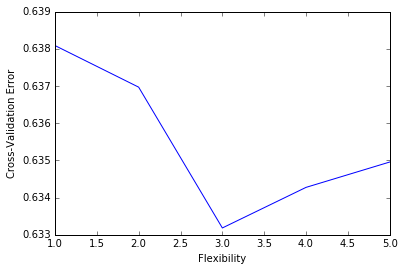

In [58]:
linreg.fit(X, y)
CV_Scores = []

for i in [X1,X2,X3,X4,X5]:
    CV_Scores.append(- cross_val_score(linreg, i, y, cv=10, 
                                       scoring = 'mean_squared_error').mean())

print(CV_Scores)

index = np.array(range(5)) + 1

plt.plot(index, CV_Scores)
plt.xlabel("Flexibility")
plt.ylabel("Cross-Validation Error")
plt.show()

In [59]:
del Data_White_Wine['alcohol_2'] 
del Data_White_Wine['alcohol_3'] 
del Data_White_Wine['alcohol_4'] 
del Data_White_Wine['alcohol_5']

In [60]:
Data_White_Wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022695,0.289175,0.088994,0.023087,-0.049418,0.091049,0.265397,-0.425883,-0.017131,-0.120856,-0.113668
volatile_acidity,-0.022695,1.000000,-0.149469,0.064386,0.070511,-0.097006,0.089278,0.027168,-0.031941,-0.035734,0.067708,-0.194721
citric_acid,0.289175,-0.149469,1.000000,0.094166,0.114367,0.094056,0.121106,0.149485,-0.163721,0.062347,-0.075683,-0.009215
residual_sugar,0.088994,0.064386,0.094166,1.000000,0.088777,0.299023,0.401359,0.838770,-0.193603,-0.026485,-0.450284,-0.097736
chlorides,0.023087,0.070511,0.114367,0.088777,1.000000,0.101400,0.198927,0.257371,-0.090463,0.016761,-0.360270,-0.209934
free_sulfur_dioxide,-0.049418,-0.097006,0.094056,0.299023,0.101400,1.000000,0.615470,0.294112,-0.000473,0.059261,-0.250000,0.008142
total_sulfur_dioxide,0.091049,0.089278,0.121106,0.401359,0.198927,0.615470,1.000000,0.529851,0.002511,0.134625,-0.448795,-0.174768
density,0.265397,0.027168,0.149485,0.838770,0.257371,0.294112,0.529851,1.000000,-0.093064,0.074702,-0.780062,-0.307360
pH,-0.425883,-0.031941,-0.163721,-0.193603,-0.090463,-0.000473,0.002511,-0.093064,1.000000,0.155889,0.121121,0.099478
sulphates,-0.017131,-0.035734,0.062347,-0.026485,0.016761,0.059261,0.134625,0.074702,0.155889,1.000000,-0.017536,0.053688


In [70]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
Data_White_Wine = pd.read_csv(url, sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])

Data_White_Wine['alcohol_3'] = Data_White_Wine['alcohol']**3

X1 = Data_White_Wine[['density', 'residual_sugar', 'total_sulfur_dioxide', 'chlorides', 'alcohol_3']]
X2 = Data_White_Wine[['density', 'residual_sugar', 'alcohol_3']]
X3 = Data_White_Wine[['density', 'alcohol_3']]
X4 = Data_White_Wine[['alcohol_3']]
X5 = Data_White_Wine[['alcohol_3', 'alcohol']]
X6 = Data_White_Wine[['alcohol_3', 'alcohol', 'density']]
X7 = Data_White_Wine[['alcohol_3', 'alcohol', 'density', 'residual_sugar']]
X8 = Data_White_Wine[['alcohol_3', 'alcohol', 'density', 'residual_sugar', 'total_sulfur_dioxide']]
X9 = Data_White_Wine[['alcohol_3', 'alcohol', 'density', 'residual_sugar', 'total_sulfur_dioxide', 'chlorides']]
X10 = Data_White_Wine[['density', 'residual_sugar', 'total_sulfur_dioxide', 'chlorides', 'alcohol']]
X11 = Data_White_Wine[['density', 'residual_sugar', 'total_sulfur_dioxide', 'alcohol']]
X12 = Data_White_Wine[['density', 'residual_sugar', 'alcohol']]
X13 = Data_White_Wine[['density', 'alcohol']]
X14 = Data_White_Wine[['alcohol']]
X15 = Data_White_Wine[['density', 'residual_sugar', 'total_sulfur_dioxide', 'alcohol_3']]

y = Data_White_Wine['quality']
lm = LinearRegression()

[0.62447176383305414, 0.62549904283358826, 0.63631795648917144, 0.63635691091307223, 0.63717638020889422, 0.63677167106907362, 0.62551519982775639, 0.62589175325279645, 0.6248283888596935, 0.62404606980901645, 0.62511690644588291, 0.62477316712703823, 0.63724271112206365, 0.63808771276665655, 0.62589902955074828]


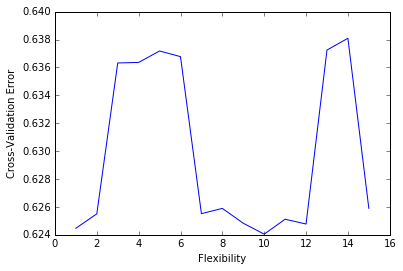

In [71]:
CV_Scores = []

for i in [X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15]:
    CV_Scores.append(- cross_val_score(lm, i, y, cv=10, 
                                       scoring = 'mean_squared_error').mean())

print(CV_Scores)

index = np.array(range(15)) + 1

plt.plot(index, CV_Scores)
plt.xlabel("Flexibility")
plt.ylabel("Cross-Validation Error")
plt.show()

In [76]:
X10 = Data_White_Wine[['density', 'residual_sugar', 'total_sulfur_dioxide', 'chlorides', 'alcohol']]
y = Data_White_Wine['quality']

linreg = LinearRegression()
linreg.fit(X10, y)

linreg = smf.ols(formula = 'y ~ X10', data = Data_White_Wine).fit()
print(linreg.pvalues)

Intercept    6.705461e-13
X10[0]       2.432627e-12
X10[1]       6.732872e-24
X10[2]       1.557274e-01
X10[3]       1.087428e-03
X10[4]       3.541623e-37
dtype: float64


In [77]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 14 Jul 2016   Prob (F-statistic):          4.66e-250
Time:                        20:05:13   Log-Likelihood:                -5769.9
No. Observations:                4897   AIC:                         1.155e+04
Df Residuals:                    4891   BIC:                         1.159e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     91.3067     12.673      7.205      0.000        66.461   116.152
X10[0]       -88.7615     12.635     -7.025      0.000      -113.532   -63.991
X10[1]         0.0519      0.005     10.134      0.000         0.042     0.062
X10[2]         0.0004      0.000      1.420      0.156        -0.000     0.001
X10[3]        -1.8176      0.556     -3.269      0.001        -2.908    -0.728
X10[4]         0.2370      0.018     12.847      0.000         0.201     0.273
==============================================================================
Omnibus:                       85.952   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.368
Skew:                           0.065   Prob(JB):                     4.53e-37
Kurtosis:                       3.896   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model => 91.3067 - 88.7615 * density + 0.0519 * residual_sugar + 0.0004 * total_sulfur_dioxide - 1.8176 * chlorides + 0.2370 * alcohol  

In [78]:
###### PART 2 

In [80]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X - X_Min)/(X_Max - X_Min)
    return X_Standardized

for i in ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']:
    Data_White_Wine[i] = Standardize(Data_White_Wine[i])

Data_White_Wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,alcohol_3
0,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5,857.375
1,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5,1030.301
2,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5,970.299
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5,970.299
4,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5,1030.301


In [ ]:
# standardize or preprocess 

In [82]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
Data_White_Wine = pd.read_csv(url, sep = ';', header = 1,names = ['fixed_acidity','volatile_acidity',
                                                       'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
                                                       'total_sulfur_dioxide','density','pH',
                                                       'sulphates','alcohol','quality'])

Data_White_Wine_New = preprocessing.scale(Data_White_Wine) 
Data_White_Wine_New = pd.DataFrame(Data_White_Wine_New)   
Data_White_Wine_New.columns = Data_White_Wine.columns.values
Data_White_Wine_New.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.657401,0.215857,0.048040,-0.944861,0.147725,-1.252816,-0.149526,-0.008682,0.739816,0.001270,-0.824639,0.137884
1,1.475640,0.017433,0.543829,0.100930,0.193496,-0.312003,-0.973139,0.359304,0.474874,-0.436848,-0.336984,0.137884
2,0.409120,-0.478625,-0.117223,0.416641,0.559662,0.687610,1.121192,0.526570,0.011226,-0.787343,-0.499536,0.137884
3,0.409120,-0.478625,-0.117223,0.416641,0.559662,0.687610,1.121192,0.526570,0.011226,-0.787343,-0.499536,0.137884
4,1.475640,0.017433,0.543829,0.100930,0.193496,-0.312003,-0.973139,0.359304,0.474874,-0.436848,-0.336984,0.137884


In [85]:
X = Data_White_Wine_New[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
y = Data_White_Wine_New['quality']

knn = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
knn.fit(X, y)

ValueError: Unknown label type: array([[ 0.13788448],
       [ 0.13788448],
       [ 0.13788448],
       ..., 
       [ 0.13788448],
       [ 1.26701545],
       [ 0.13788448]])